In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import swarmplot
from pathlib import Path
import datetime
from ydata_profiling import ProfileReport
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pmdarima as pm
#from fbprophet import Prophet

import xgboost as xgb


from pandas import to_datetime
from pmdarima.model_selection import train_test_split
from numpy import *

from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr

%matplotlib inline

import random
from numpy import * 
from sklearn.metrics import roc_curve, auc

import itertools
import warnings
import time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error, mean_absolute_percentage_error


warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [2]:
def load_demand_full_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/model_data_v4.csv"))

In [3]:
# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('knn', KNeighborsRegressor()))
 level0.append(('cart', DecisionTreeRegressor()))
 level0.append(('rf', RandomForestRegressor()))
 level0.append(('gb', GradientBoostingRegressor()))
 level0.append(('svm', SVR()))
 # define meta learner model
 level1 = LinearRegression()
 # define the stacking ensemble
 model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
 return model

In [4]:
dem_data = load_demand_full_data()

In [5]:
# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn'] = KNeighborsRegressor()
 models['cart'] = DecisionTreeRegressor()
 models['rf'] = RandomForestRegressor()
 models['gb'] = GradientBoostingRegressor()
 models['svm'] = SVR()
 models['stacking'] = get_stacking()
 return models

In [6]:

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [7]:
dem_data.head()

,year,month,date,temp_mean,temp_min,temp_max,temp_avg_daily_min,temp_avg_daily_max,degree_days,demand_mean,demand_max,demand_avg_daily_max,total_consumption,pv_capacity,population,gsp
0,2010,1,2010-01-01,20.868008,1.6,41.1,16.380645,25.858065,144.511358,8941.450389,13765.04,10613.530000,6554083.135,28278.392,7110454,44504.25
1,2010,2,2010-02-01,20.218907,3.2,35.4,16.146429,24.682143,124.982743,8855.467677,13377.27,10380.667857,5831325.465,32153.986,7119405,44504.25
2,2010,3,2010-03-01,19.828286,6.3,34.7,15.496774,24.725806,106.809763,8698.725127,11991.47,10132.978710,6319623.805,38195.588,7128356,44504.25
3,2010,4,2010-04-01,17.593856,6.5,29.9,12.780000,23.063333,68.136038,8452.863411,11436.13,9804.072333,5984627.295,45142.723,7133668,44504.25
4,2010,5,2010-05-01,15.323485,3.1,28.4,11.187097,19.596774,123.937772,8897.770510,12386.49,10558.023548,6459781.390,54370.332,7138980,44504.25


In [8]:
dem_data.tail()

,year,month,date,temp_mean,temp_min,temp_max,temp_avg_daily_min,temp_avg_daily_max,degree_days,demand_mean,demand_max,demand_avg_daily_max,total_consumption,pv_capacity,population,gsp
139,2021,8,2021-08-01,21.104167,16.9,30.7,17.766667,24.966667,9.312500,7368.353056,9043.62,8410.176667,530521.420,3954209.744,8091356,57391.083333
140,2021,9,2021-09-01,20.999306,14.2,27.5,15.433333,25.300000,8.997917,7229.393819,9206.19,8469.680000,520516.355,4033918.477,8088503,57391.083333
141,2021,10,2021-10-01,21.084722,14.8,26.9,16.300000,25.466667,9.254167,7209.823194,8841.21,8575.093333,519107.270,4112353.036,8092743,57391.083333
142,2021,11,2021-11-01,22.118056,15.7,27.3,16.466667,26.566667,12.354167,7649.492569,9573.70,9336.970000,550763.465,4192992.282,8096983,57391.083333
143,2021,12,2021-12-01,23.685417,16.1,33.5,18.100000,30.200000,17.056250,7986.625903,10376.04,9784.833333,575037.065,4291459.770,8101223,57391.083333


In [9]:
dem_data_excl2021 = dem_data.drop(dem_data[dem_data['year'] == 2021].index)

In [10]:
dem_data_excl2021.tail()

,year,month,date,temp_mean,temp_min,temp_max,temp_avg_daily_min,temp_avg_daily_max,degree_days,demand_mean,demand_max,demand_avg_daily_max,total_consumption,pv_capacity,population,gsp
127,2020,8,2020-08-01,14.613374,2.2,27.8,9.093548,20.074194,130.397917,7827.362594,11500.53,9764.800000,5823557.770,2969007.614,8102807,56109.666667
128,2020,9,2020-09-01,16.460153,4.9,30.5,11.330000,21.723333,81.650543,7326.909750,11721.16,9027.053000,5268048.110,3054829.298,8098905,56109.666667
129,2020,10,2020-10-01,17.598051,7.0,30.2,13.467742,21.980645,68.068750,7340.289409,11920.34,8757.940323,5461175.320,3137388.115,8097370,56109.666667
130,2020,11,2020-11-01,20.184861,6.5,40.4,14.886667,25.863333,114.450000,7584.268118,12401.82,9291.636333,5460673.045,3234844.871,8095835,56109.666667
131,2020,12,2020-12-01,19.403831,5.2,32.3,15.470968,24.016129,104.077083,7300.258421,10863.32,8608.121290,5431392.265,3340420.498,8094300,56109.666667


In [11]:
peakDemand_w_DD = dem_data_excl2021.drop([ 'year', 'month', 'date','temp_mean', 'temp_min', 'temp_max', 'demand_mean','demand_max', 'total_consumption', 'gsp','temp_avg_daily_max','temp_avg_daily_min'], axis=1)

In [12]:
peakDemand_w_DD.head()

,degree_days,demand_avg_daily_max,pv_capacity,population
0,144.511358,10613.530000,28278.392,7110454
1,124.982743,10380.667857,32153.986,7119405
2,106.809763,10132.978710,38195.588,7128356
3,68.136038,9804.072333,45142.723,7133668
4,123.937772,10558.023548,54370.332,7138980


In [13]:
peakDemand_w_DD.to_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand_W_DD.txt"),  sep=',', index=False, header=None)

In [14]:

# min_max = MinMaxScaler()

# peakDemand_w_DD_min_max = min_max.fit_transform(peakDemand_w_DD)

In [15]:
# scaled_df_peakDemand_w_DD_min_max = pd.DataFrame(peakDemand_w_DD_min_max, columns=['degree_days', 'demand_avg_daily_max',
#        'pv_capacity', 'population'])

### Stacking for Regression - Peak Demand (DD) with Normalisation

In [16]:
X = peakDemand_w_DD.iloc[:,[0,2,3]].values
transformer = MinMaxScaler().fit(X)  # fit does nothing.
X = transformer.transform(X)
y = peakDemand_w_DD.iloc[:, 1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
# get the models to evaluate
models = get_models()

In [19]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>knn -210.129 (36.627)
>cart -234.262 (59.083)
>rf -188.126 (36.565)
>gb -190.883 (36.629)
>svm -515.757 (91.495)
>stacking -191.411 (36.308)


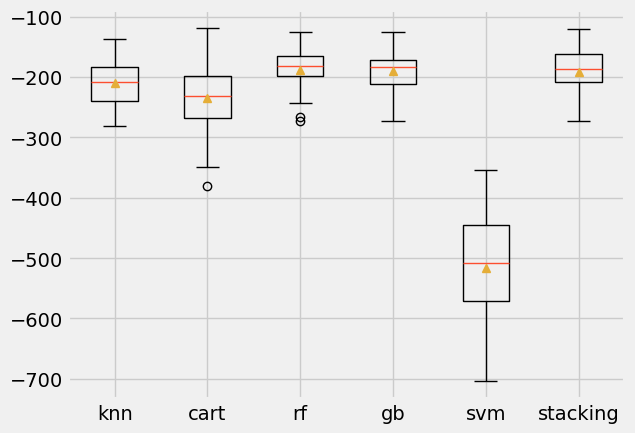

In [20]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

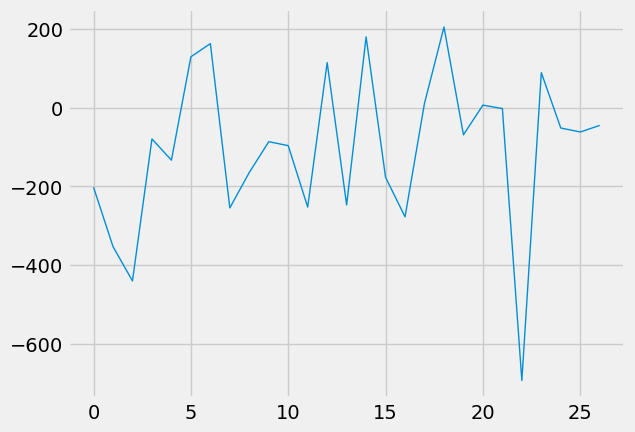

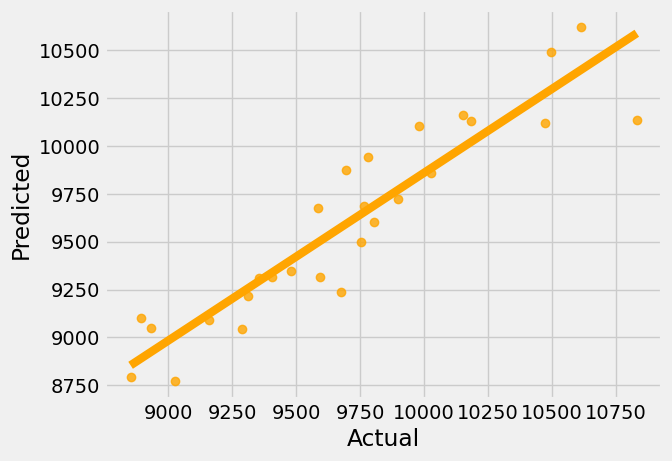

RMSE: 224.11413806512624
MAPE: 1.7367128354853736 %
R-Squared: 0.8143988796883137


In [21]:
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('rf', RandomForestRegressor()))
level0.append(('gb', GradientBoostingRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
# make a prediction for one example
yhat = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mape = mean_absolute_percentage_error(y_test, yhat)*100
rsquared = r2_score(y_test, yhat)
residuals = yhat - y_test
plt.plot(residuals, linewidth=1)
plt.savefig('scikit_linear.png')
plt.show()
sns.regplot(x=y_test,y=yhat,ci=None,color ='orange');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.savefig('regression_plot_2 features.png')
plt.show()
print('RMSE:', rmse)
print('MAPE:', str(mape) + str(' %'))
print('R-Squared:', rsquared)


In [22]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("RMSE score:",np.sqrt(mean_squared_error(y_test,y_predict)))
    return y_test,y_predict

def splitter_v2(tab,y_indicator):
    from sklearn.model_selection import train_test_split
    # Asignamos X e y, eliminando la columna y en X
    X = correlacion(tab,y_indicator)
    y = tab[:,y_indicator]
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    return X_train, X_test, y_train, y_test

In [23]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    #X_train, X_test, y_train, y_test = splitter_v2(tab,1)
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE score: 200.41450618894459
Best Score: 0.8557073379714311
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 10}
Loop:  1
--------------


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE score: 223.734149760016
Best Score: 0.8421482748347187
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
Loop:  2
--------------


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE score: 217.59976377503563
Best Score: 0.8516642608345835
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
Loop:  3
--------------


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE score: 203.42665338990398
Best Score: 0.8463985246517847
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  4
--------------
RMSE score: 222.28158012564472
Best Score: 0.8488789951324798
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 10}


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
